Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 

Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.

Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task:-

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [4]:
df = pd.read_csv("../input/bharti-airtel-stock/BhartiAirtel.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2581,2011-01-03,358.40,364.90,354.50,359.35,360.257123,316463,5263,114008050.0,82793.0,26.16,10.40,0.95
2580,2011-01-04,361.00,361.75,353.10,355.30,359.347771,510966,3163,183614493.0,364759.0,71.39,8.65,-5.70
2579,2011-01-05,353.90,355.70,348.35,349.90,351.481252,172421,2552,60602749.0,43428.0,25.19,7.35,-4.00
2578,2011-01-06,351.00,355.35,351.00,353.25,353.230604,196241,2516,69318327.0,41231.0,21.01,4.35,2.25
2577,2011-01-07,353.90,354.75,335.00,338.70,342.594042,358515,5778,122825103.0,73576.0,20.52,19.75,-15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15
3,2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
2,2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
1,2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25


In [5]:
forecast_col = 'Close Price'
forecast_out = 5
test_size = 0.2

In [6]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [7]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast
print(response)

{'test_score': 0.9506536002689049, 'forecast_set': array([531.67060568, 529.66462612, 526.4354883 , 528.88180483,
       529.4689208 ])}


In [13]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
data = pd.read_csv("../input/bharti-airtel-stock/BhartiAirtel.csv")
data.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-June-2021,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802.0,398176.0,60.15,4.50,-2.10
1,3-June-2021,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25
2,2-June-2021,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
3,1-June-2021,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
4,31-May-2021,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data_sort = data.sort_values('Date')
data_sort

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2581,2011-01-03,358.40,364.90,354.50,359.35,360.257123,316463,5263,114008050.0,82793.0,26.16,10.40,0.95
2580,2011-01-04,361.00,361.75,353.10,355.30,359.347771,510966,3163,183614493.0,364759.0,71.39,8.65,-5.70
2579,2011-01-05,353.90,355.70,348.35,349.90,351.481252,172421,2552,60602749.0,43428.0,25.19,7.35,-4.00
2578,2011-01-06,351.00,355.35,351.00,353.25,353.230604,196241,2516,69318327.0,41231.0,21.01,4.35,2.25
2577,2011-01-07,353.90,354.75,335.00,338.70,342.594042,358515,5778,122825103.0,73576.0,20.52,19.75,-15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15
3,2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
2,2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
1,2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25


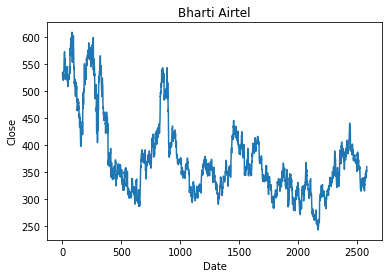

In [15]:
close = data_sort['Close Price']
ax = close.plot(title='Bharti Airtel')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [ ]:
data_sort["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data_sort = data_sort[["Date", "Close Price"]]


In [17]:
data_sort = data_sort.rename(columns={"Date" : "ds", "Close Price" : "y" })

In [ ]:
data_sort

In [24]:
model = Prophet()
model.fit(data_sort)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2942,2022-05-31,702.370337,637.380762,779.150619
2943,2022-06-01,702.872074,633.189822,779.402585
2944,2022-06-02,702.878518,632.981840,777.216426
2945,2022-06-03,703.282991,631.358592,774.176068
2946,2022-06-04,695.097315,625.451786,769.040197


In [25]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-03,341.988452,304.623277,384.662728,341.988452,341.988452,4.570406,4.570406,4.570406,1.073113,1.073113,1.073113,3.497292,3.497292,3.497292,0.0,0.0,0.0,346.558858
1,2011-01-04,342.172700,309.049825,386.349839,342.172700,342.172700,5.196238,5.196238,5.196238,1.048349,1.048349,1.048349,4.147889,4.147889,4.147889,0.0,0.0,0.0,347.368938
2,2011-01-05,342.356948,308.179591,387.236070,342.356948,342.356948,5.704140,5.704140,5.704140,0.940158,0.940158,0.940158,4.763981,4.763981,4.763981,0.0,0.0,0.0,348.061087
3,2011-01-06,342.541196,307.966273,388.538068,342.541196,342.541196,5.675439,5.675439,5.675439,0.338189,0.338189,0.338189,5.337250,5.337250,5.337250,0.0,0.0,0.0,348.216635
4,2011-01-07,342.725443,307.988981,387.111990,342.725443,342.725443,5.996864,5.996864,5.996864,0.136081,0.136081,0.136081,5.860784,5.860784,5.860784,0.0,0.0,0.0,348.722308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2022-05-31,699.125800,637.380762,779.150619,642.370094,764.249255,3.244537,3.244537,3.244537,1.048349,1.048349,1.048349,2.196188,2.196188,2.196188,0.0,0.0,0.0,702.370337
2943,2022-06-01,699.435232,633.189822,779.402585,642.487712,765.053630,3.436842,3.436842,3.436842,0.940158,0.940158,0.940158,2.496683,2.496683,2.496683,0.0,0.0,0.0,702.872074
2944,2022-06-02,699.744665,632.981840,777.216426,642.618981,765.858004,3.133853,3.133853,3.133853,0.338189,0.338189,0.338189,2.795664,2.795664,2.795664,0.0,0.0,0.0,702.878518
2945,2022-06-03,700.054097,631.358592,774.176068,642.750249,766.119425,3.228894,3.228894,3.228894,0.136081,0.136081,0.136081,3.092814,3.092814,3.092814,0.0,0.0,0.0,703.282991


In [26]:
forcast.loc[(forcast['ds'] == '2021-06-07' )]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2584,2021-06-07,588.348963,549.838934,632.135521,588.348963,588.348963,5.41262,5.41262,5.41262,1.073113,1.073113,1.073113,4.339507,4.339507,4.339507,0.0,0.0,0.0,593.761583


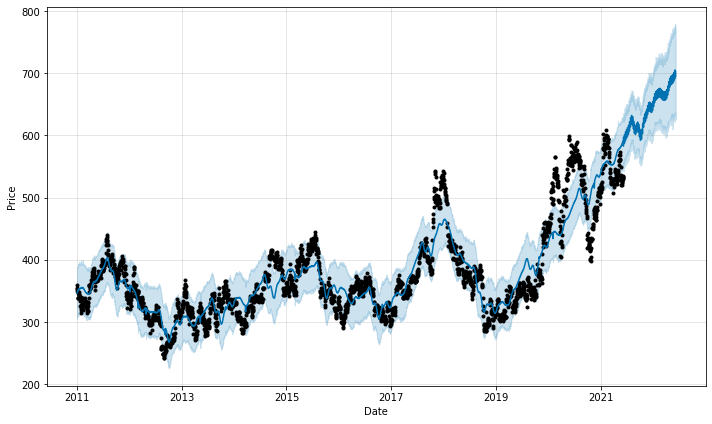

In [27]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")